In [152]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy.fft import rfft, rfftfreq, irfft

noisy wave in time


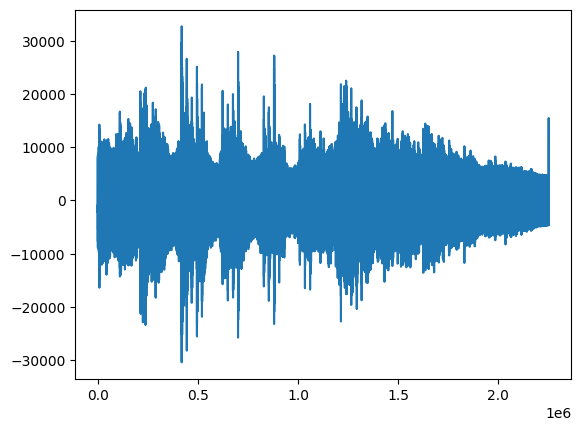

In [153]:
sample_rate, noisy_wave = wavfile.read('noisy_tlou.wav')

normalized_tone = np.int16((noisy_wave / noisy_wave.max()) * 32767)

N0 = len(normalized_tone)
print('noisy wave in time')
plt.plot(normalized_tone)
plt.show()

noisy wave in freq (indicates noises)


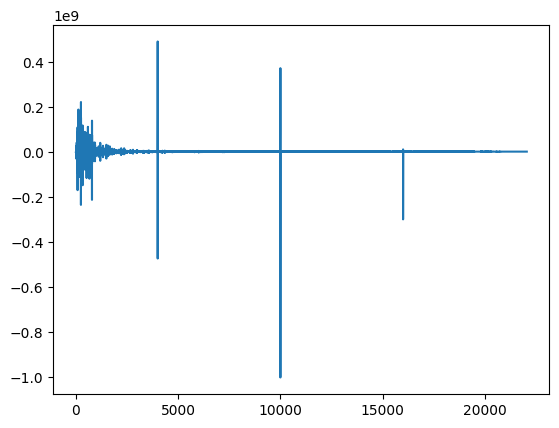

In [154]:


rff_normal = rfft(normalized_tone)

rff_normal_freq=rfftfreq(N0, 1 / sample_rate)

print("noisy wave in freq (indicates noises)")

plt.plot(rff_normal_freq, np.real(rff_normal))
plt.show()


noisy Spectrograms 


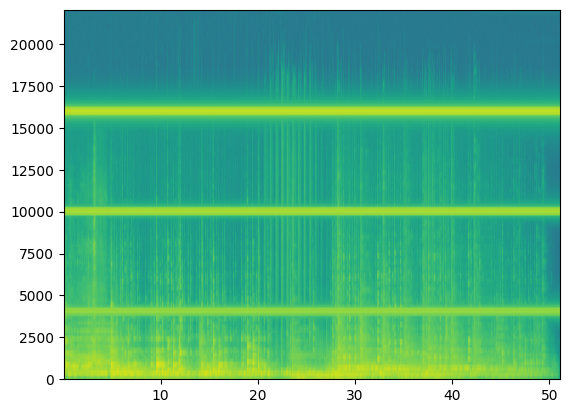

In [155]:
print('noisy Spectrograms ')
plt.specgram(noisy_wave,Fs=sample_rate)
plt.show()

removing noises in freq


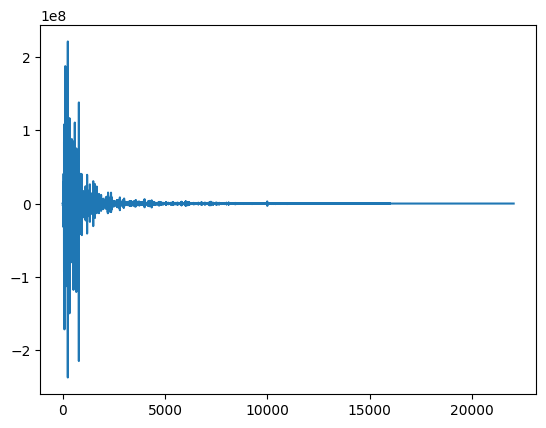

In [156]:
point_per_freq = len(rff_normal_freq) / (sample_rate / 2)
t1 = int(point_per_freq * 4000)
t2 = int(point_per_freq * 10000)
t3 = int(point_per_freq * 16000)
rff_normal[t1 - 50: t1 + 50] = 0
rff_normal[t2 - 100: t2 + 100] = 0
rff_normal[t3 - 100: t3 + 100] = 0

print('removing noises in freq')

plt.plot(rff_normal_freq, np.real(rff_normal))
plt.show()


fast without noise in freq


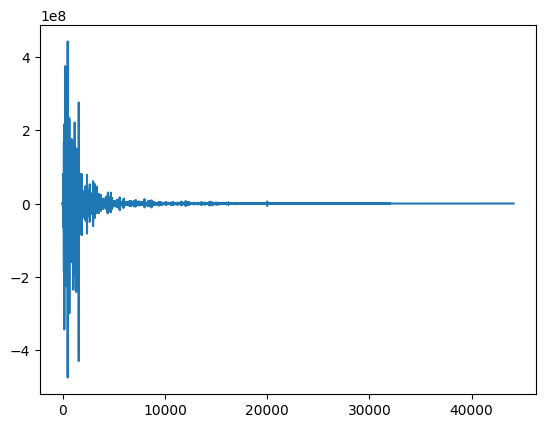

In [157]:
fast = 2 * rff_normal
x_fast = rfftfreq(N0, 1 / 2 / sample_rate)

print('fast without noise in freq')
plt.plot(x_fast,np.real(fast))
plt.show()

slow without noise in freq


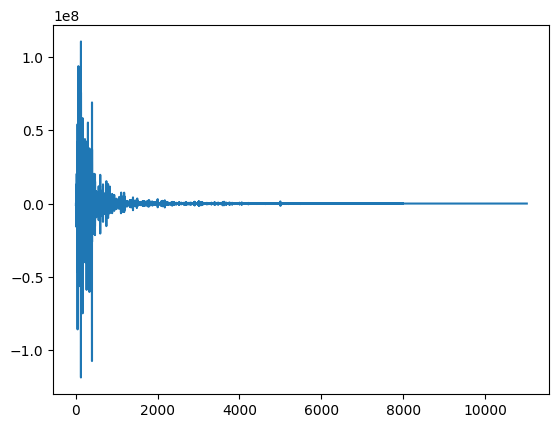

In [158]:
slow = 0.5 * rff_normal
x_slow = rfftfreq(N0, 1 / (0.5 * sample_rate))

print('slow without noise in freq')
plt.plot(x_slow,np.real(slow))
plt.show()

normal in time


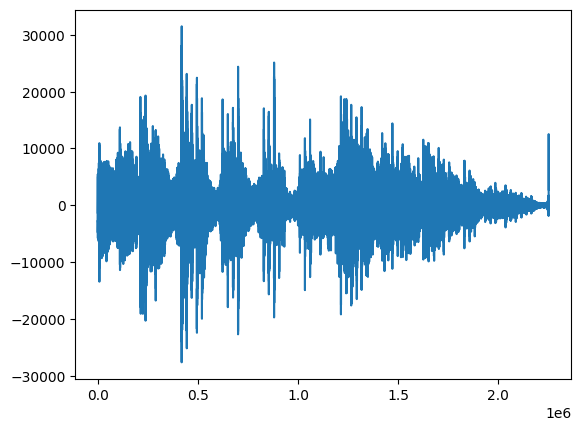

In [159]:

normal_in_time=irfft(rff_normal)
x_normal_in_time=np.linspace(0,len(noisy_wave),len(normal_in_time))
print('normal in time')
plt.plot(x_normal_in_time,normal_in_time)
plt.show()


fast in time


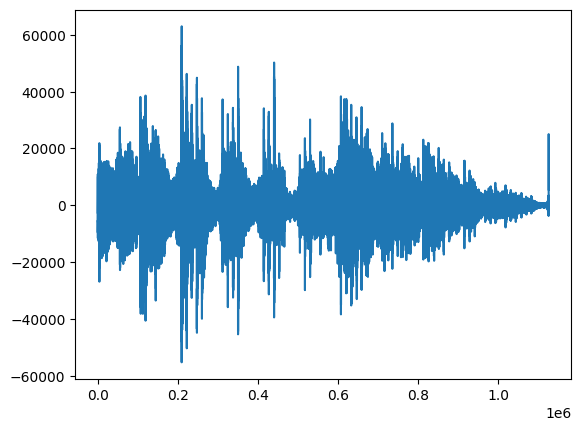

In [160]:
fast_in_time=irfft(fast)
x_fast_in_time=np.linspace(0,len(noisy_wave)/2,len(fast_in_time))
print('fast in time')
plt.plot(x_fast_in_time,fast_in_time)
plt.show()

slow in time


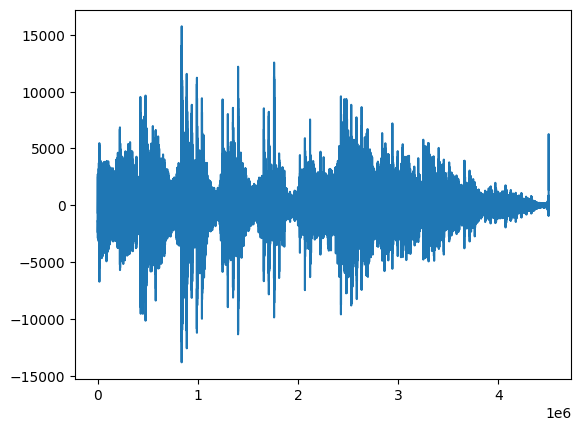

In [161]:
slow_in_time = irfft(slow)
x_slow_in_time = np.linspace(0, len(noisy_wave) * 2, len(slow_in_time))
print('slow in time')
plt.plot(x_slow_in_time, slow_in_time)
plt.show()

normal Spectrograms


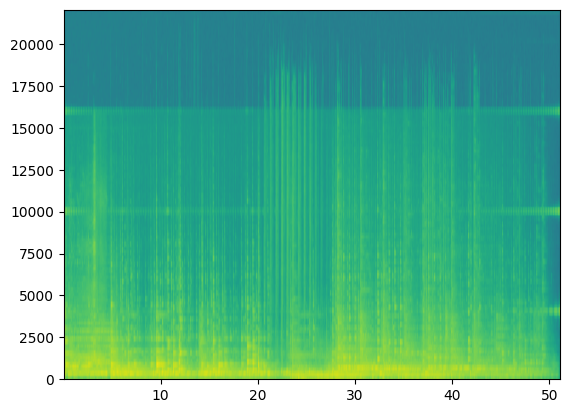

In [162]:
print('normal Spectrograms')
plt.specgram(normal_in_time, Fs=sample_rate)
plt.show()

fast Spectrograms


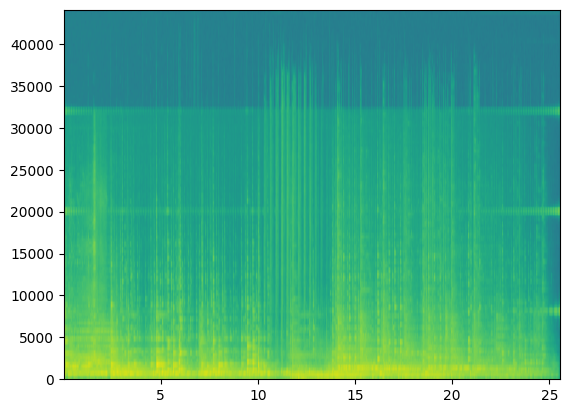

In [163]:
print('fast Spectrograms')
plt.specgram(normal_in_time, Fs=sample_rate*2)
plt.show()

slow Spectrograms


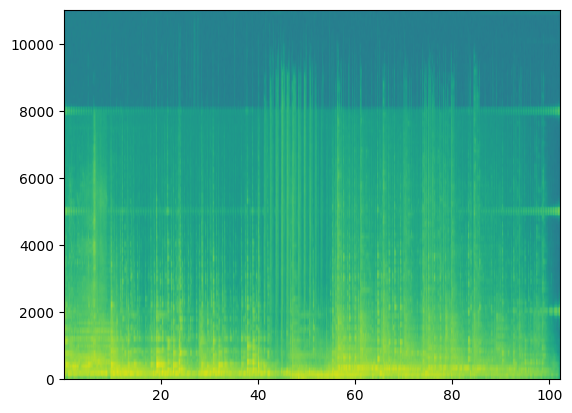

In [164]:
print('slow Spectrograms')
plt.specgram(normal_in_time, Fs=sample_rate/2)
plt.show()

In [165]:
wavfile.write('normal.wav', sample_rate, np.int16(normal_in_time * (32767 / normal_in_time.max())))
wavfile.write('fast.wav', sample_rate*2, np.int16(normal_in_time * (32767 / fast_in_time.max())))
wavfile.write('slow.wav', int(sample_rate/2), np.int16(normal_in_time * (32767 / slow_in_time.max())))
